In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [171]:
YEARS = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

pipeCounts = eval(open('../data/pipe_counts.txt').read())

areas = [
    ('Arts and Sciences', 'A&S'),
    ('Humanities', 'HUM'),
    ('Natural Sciences', 'NS'),
    ('Social Sciences', 'SS'),
]

levels = [
    ('Undergraduate Major and Concentrator Students', 'UC'),
    ('Graduate Students', 'GS'),
    ('Tenure Eligible Faculty', 'TE'),
    ('Tenured Faculty', 'TF'),
]

def requestTable(area, level, years=YEARS):
    try:
        areaName = areas[area][0]
        levelName = levels[level][0]
    except (IndexOutOfBoundsError, TypeError) as e:
        print('Table could not be retrieved.')
        
    df = pd.DataFrame([YEARS] + pipeCounts[areaName][levelName])
    df = df.rename({0:'Year', 1: 'Women', 2: 'Men'}).T    
    if len(years) < len(YEARS): # we specified a few years only
        df = df.loc[df['Year'].isin(years)].reset_index()
    return df

In [200]:
def plotSquare(plot, area, level, equality=True, abbreviate=True, years=YEARS, line=True):
    labelIndex = 1 if abbreviate else 0
    plot.set_title('Women vs. Men {} in {}'.format(levels[level][labelIndex], areas[area][labelIndex]))
    
    table = requestTable(area, level, years=years)
    plotterFn = plot.plot if line else plot.scatter
    plotterFn(table['Men'], table['Women'], linestyle='--', marker='o', color='b')
    plot.set_xlabel('Number of Men')
    plot.set_ylabel('Number of Women')
    
    axMin = min(min(table['Women']), min(table['Men']))
    axMax = max(max(table['Women']), max(table['Men']))
    padding = int((axMax - axMin) * 0.1)
    axMin -= padding
    axMax += padding
    plot.axis(xmin=axMin,xmax=axMax,ymin=axMin,ymax=axMax)
    plot.grid('scaled', linestyle='dotted')
    
    if equality: # graph equality line
        plot.plot([axMin, axMax], [axMin, axMax], linestyle='--', marker='', color='#aaaaaa')

    for y in range(len(years)):
        plot.annotate(table['Year'][y], (table['Men'][y], table['Women'][y]))

## Visualizing every Women vs. Men plot across academic areas and levels

In the following 16 charts we visualize female representation in each academic level of each academic area. In the vertical axis we represent the number of women, in the horizontal axis the number of men. Each axis encompasses the same population range so we can easily see the proportions of women and men. A diagonal line across each chart represents an equal number of men and women.

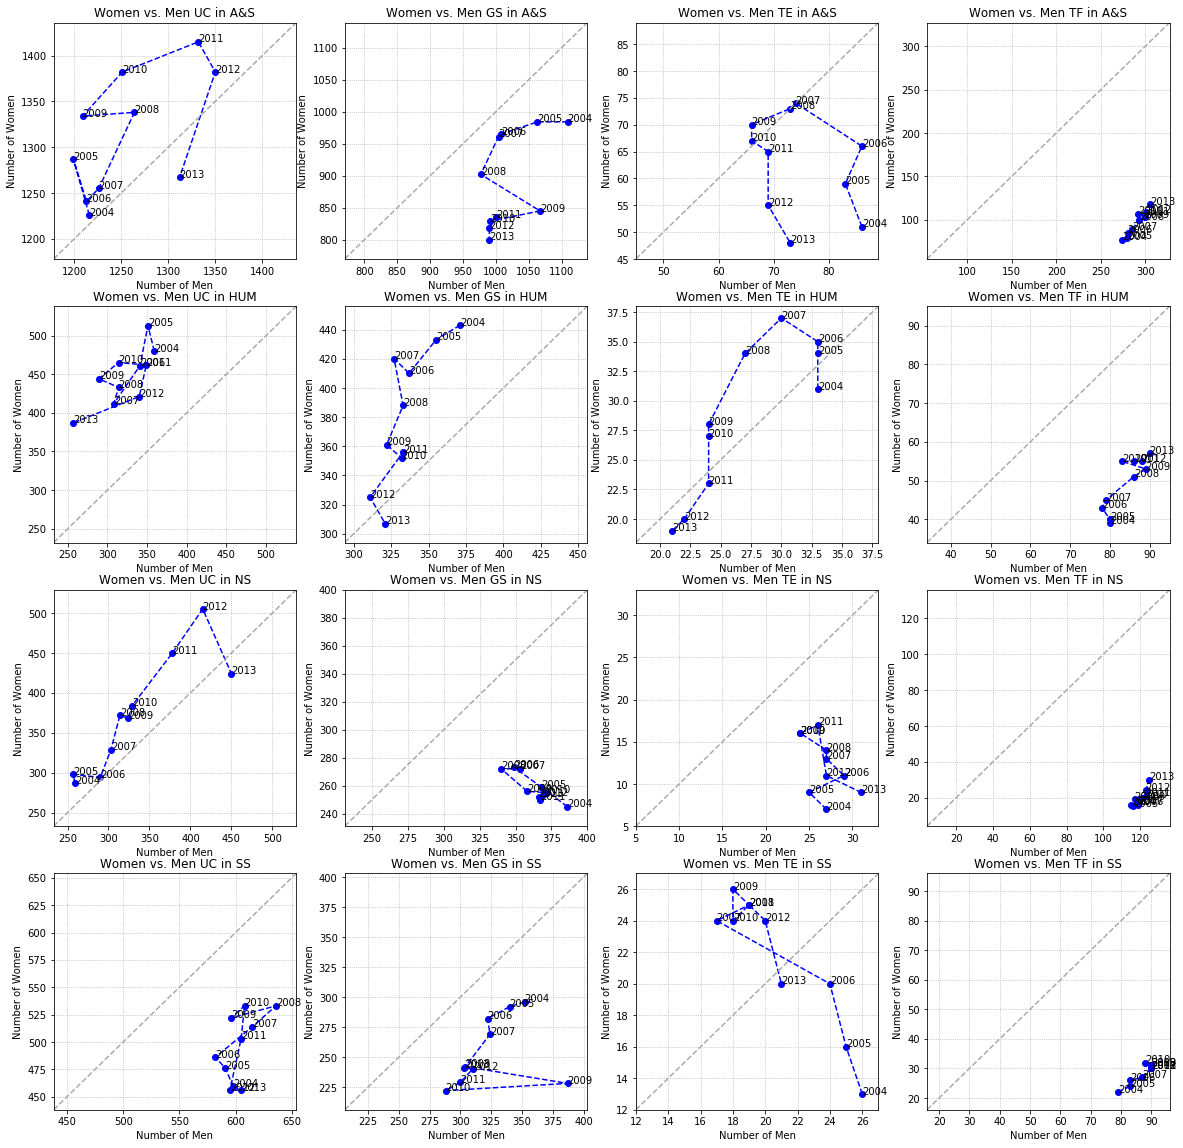

In [209]:
fig, ax_lst = plt.subplots(len(areas), len(levels), figsize=(20,20))
for a in range(len(areas)):
    for l in range(len(levels)):
        plotSquare(ax_lst[a, l], a, l)

## Women across the Humanities

We notice that undergraduates and concentrator students in the Humanities are predominantly female, but tenured faculty in the Humanities are predominantly male. Let's plot this side by side.

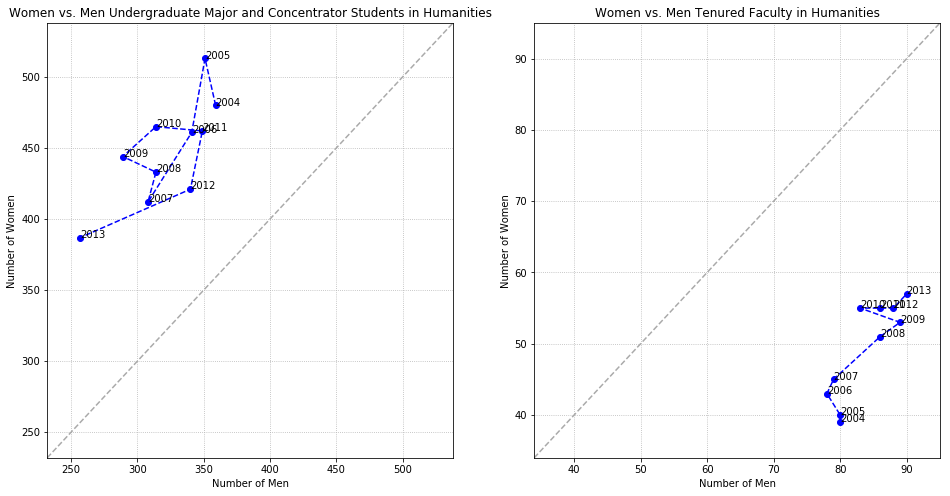

In [202]:
fig, ax_lst = plt.subplots(1, 2, figsize=(16,8))
plotSquare(ax_lst[0], 1, 0, equality=True, abbreviate=False)
plotSquare(ax_lst[1], 1, 3, equality=True, abbreviate=False)

The difference is substantial. To see more obvious gaps, let's try to use line graphs.

In [220]:
def plotLines(plot, area, level, abbreviate=True):
    labelIndex = 1 if abbreviate else 0
    plot.set_title('Total Women vs. Men {} in {}'.format(levels[level][labelIndex], areas[area][labelIndex]))
    
    table = requestTable(area, level)
    plot.plot(table['Year'], table['Men'], linestyle='-', marker='', color='b', label='Men')
    plot.plot(table['Year'], table['Women'], linestyle='-', marker='', color='g', label='Women')
    plot.set_xlabel('Year')
    plot.set_ylabel('Number of People')
    plot.axis(ymin=0)
    plot.legend()
    
    plot.yaxis.grid(True)

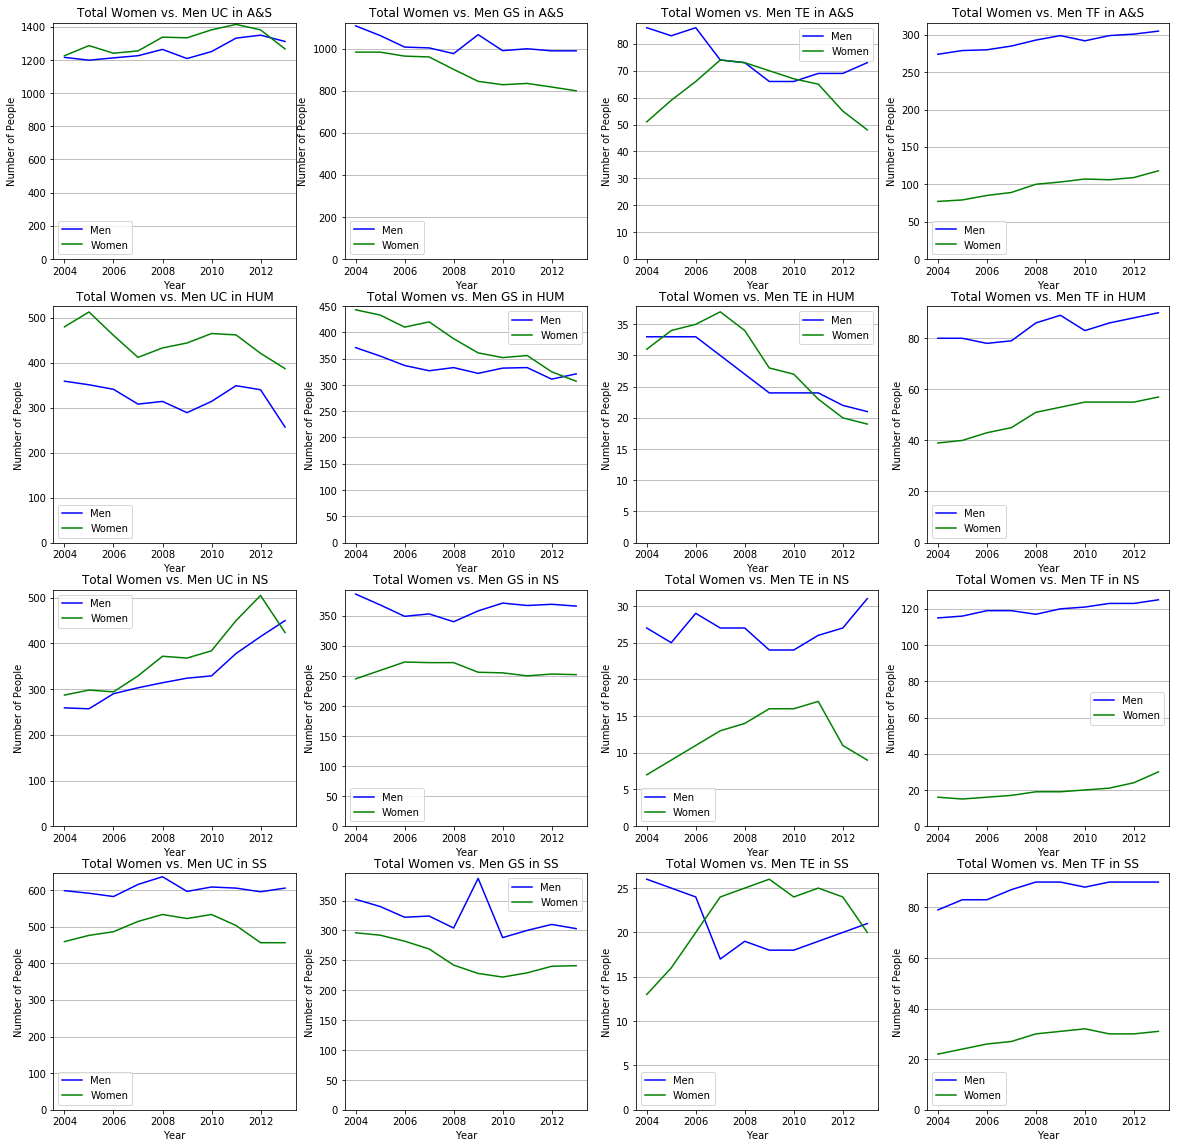

In [212]:
fig, ax_lst = plt.subplots(len(areas), len(levels), figsize=(20,20))
for a in range(len(areas)):
    for l in range(len(levels)):
        plotLines(ax_lst[a, l], a, l)

Through this type of visualization we notice large representation gaps across *all four academic areas* between undergrads and tenured faculty (**even with our vertical axis now starting at 0**). (And notice how the Men line and Women line swap places between these two levels). Let's place these transitions this side by side. 

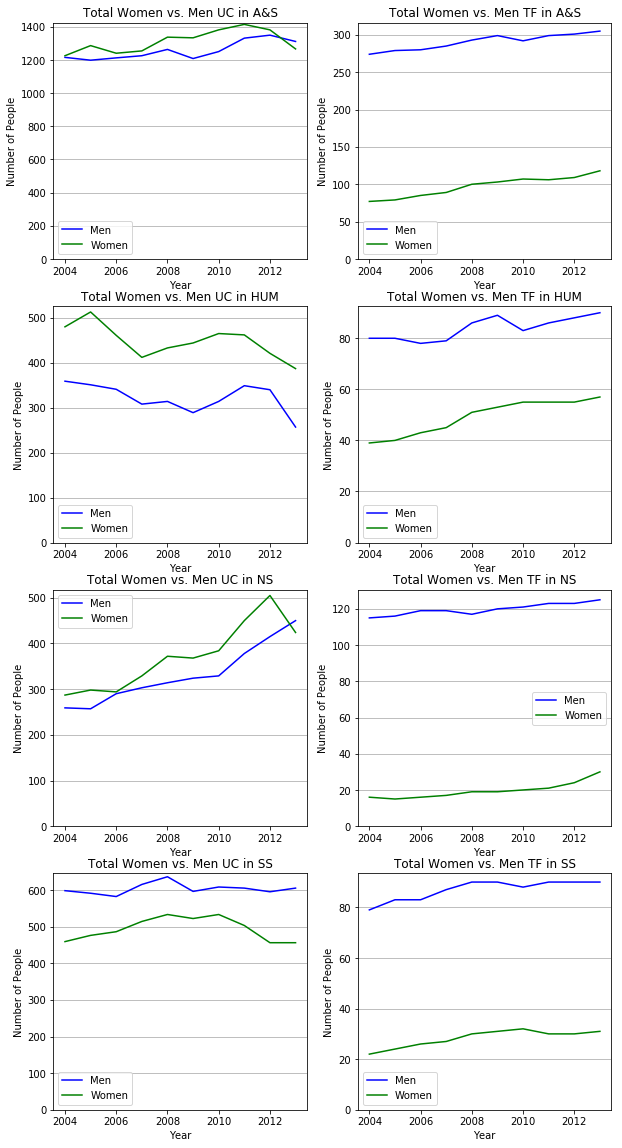

In [222]:
fig, ax_lst = plt.subplots(len(areas), 2, figsize=(10,20))
for a in range(len(areas)):
    for l in [0, 1]:
        plotLines(ax_lst[a, l], a, l*3)

## 